In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

tf.keras.backend.clear_session()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df_kc = pd.read_csv('kc_house_data.csv')
print(df_kc.shape)
display(df_kc.head())

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_kc['date'] = pd.to_datetime(df_kc['date'])
df_kc['year_sold'] = pd.to_datetime(df_kc['date']).dt.year

df_kc['Age_of_house'] = df_kc['year_sold']-df_kc['yr_built']
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,Age_of_house
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [ ]:
df_kc[df_kc.columns[1:]].corr()['price'][:]

date            -0.004357
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
year_sold        0.003576
Age_of_house    -0.053951
Name: price, dtype: float64

In [ ]:
df_kc.yr_renovated[df_kc.yr_renovated !=0] =1
df_kc.yr_renovated.max()
df_kc['yr_renovated'].value_counts()

yr_renovated
0    20699
1      914
Name: count, dtype: int64

In [ ]:
df_kc['zipcode'].nunique()

70

In [ ]:
df = pd.DataFrame(df_kc['zipcode'].unique(), columns=['Zipcode'])

In [ ]:
df_1 = pd.read_csv('file1.csv')

In [ ]:
df_1.head()

,zipcode,Population,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,98178,24092,4966,58707,4.85
1,98125,37081,6879,53044,5.39
2,98028,20419,3606,82448,5.66
3,98136,14770,6425,84344,2.30
4,98074,24748,2411,143686,10.68


In [ ]:
df_merged = pd.merge(df_kc, df_1, on= 'zipcode')
print(df_merged.shape)
print(df_merged.columns)

(21613, 27)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold',
       'Age_of_house', 'Population ', 'Population_density_per_sq_mile',
       'Median_Household_Income', 'Land_Area_sq_mile'],
      dtype='object')


In [ ]:
df_new = df_merged.drop(['id', 'date', 'yr_built', 'zipcode', 'lat', 'long', 'year_sold', 'Population '], axis=1)
print(df_new.shape)
df_new.head()

(21613, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59,4966,58707,4.85
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,0,1190,6780,69,4966,58707,4.85
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,0,2660,8712,47,4966,58707,4.85
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,0,1320,7619,53,4966,58707,4.85
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,0,1650,8775,84,4966,58707,4.85


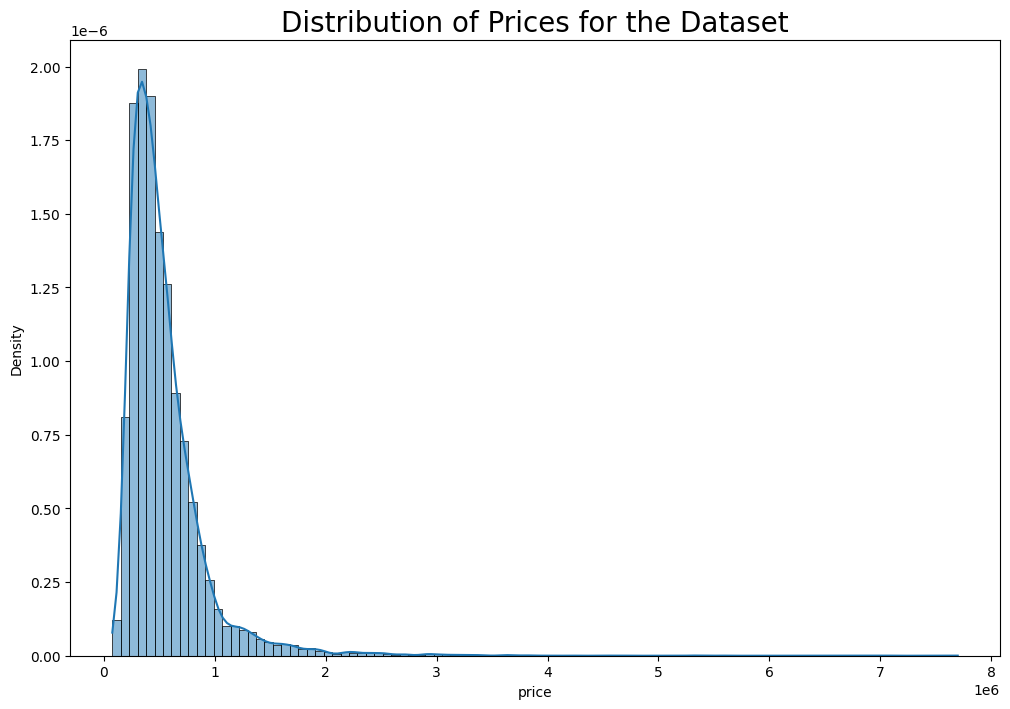

In [ ]:
plt.figure(figsize=(12,8))

sns.histplot(x = 'price', data=df_new, bins=100, ec='k', lw=0.5, stat = 'density', kde=True)
plt.title("Distribution of Prices for the Dataset", size=20)
plt.show()

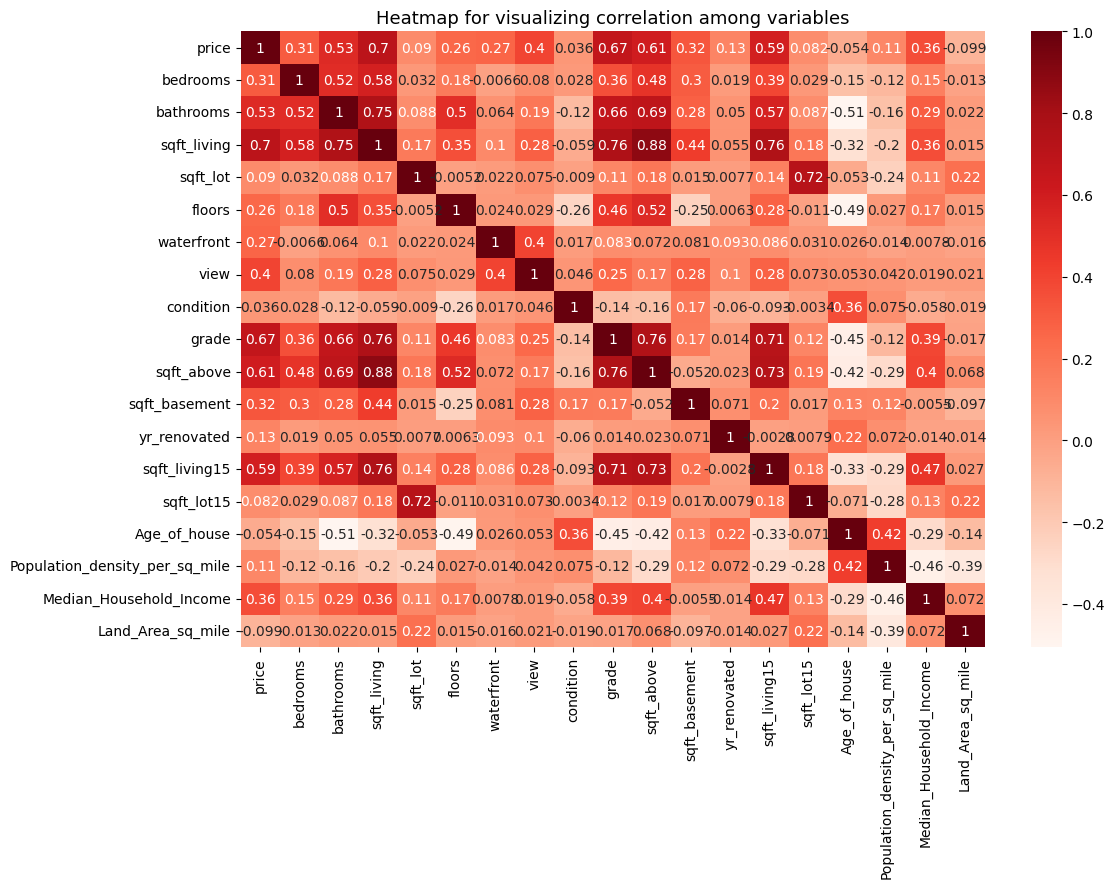

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap for visualizing correlation among variables',
         fontsize=13)
plt.show()

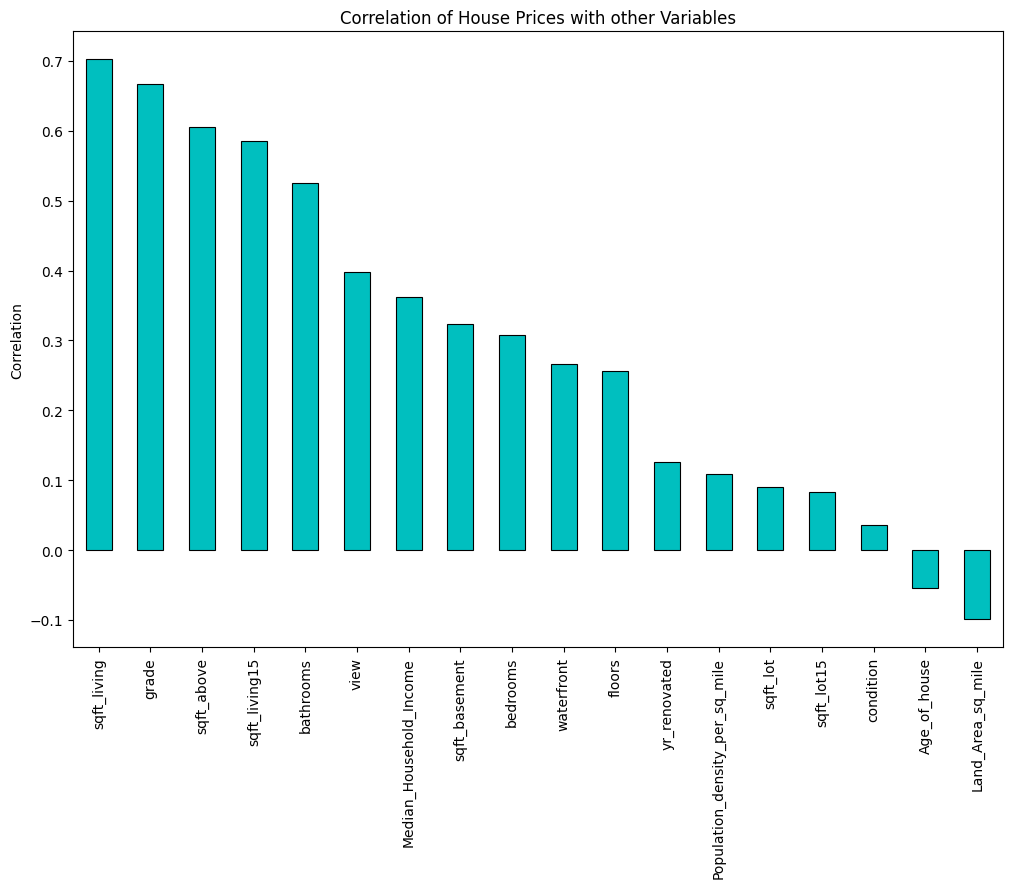

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame with numeric columns including 'price'

# Calculate correlation of 'price' with other variables, sort, and plot
df_new.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar', figsize=(12, 8), ec='k', lw=0.8, color='c')

plt.title("Correlation of House Prices with other Variables")
plt.ylabel("Correlation")
plt.show()


In [ ]:
rural_df = df_new[df_new['Population_density_per_sq_mile']<2253]
print(rural_df.shape)
rural_df.head()

(5974, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
1659,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,0,4760,101930,13,662,116518,28.37
1660,861990.0,5,2.75,3595,5639,2.0,0,0,3,9,3595,0,0,3625,5639,0,662,116518,28.37
1661,479950.0,2,2.00,1510,6516,1.0,0,0,3,8,1510,0,0,1640,6009,10,662,116518,28.37
1662,516500.0,3,2.50,1480,4729,2.0,0,0,3,7,1480,0,0,2250,4729,11,662,116518,28.37
1663,780000.0,4,2.50,3500,7048,2.0,0,0,3,9,3500,0,0,3920,7864,9,662,116518,28.37


In [ ]:
urban_df = df_new[df_new['Population_density_per_sq_mile']>2253]
print(urban_df.shape)
urban_df.head()

(15639, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59,4966,58707,4.85
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,0,1190,6780,69,4966,58707,4.85
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,0,2660,8712,47,4966,58707,4.85
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,0,1320,7619,53,4966,58707,4.85
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,0,1650,8775,84,4966,58707,4.85


In [ ]:
X_con = rural_df.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1)
X_cat  = rural_df[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = rural_df[['price']]

In [ ]:
X_cat = X_cat.reset_index(drop = True)

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [ ]:
X.shape , y.shape, X_cat.shape

((5974, 14), (5974, 1), (5974, 5))

In [ ]:

X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

In [ ]:
X_con = urban_df.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1)
X_cat  = urban_df[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = urban_df[['price']]

In [ ]:
X_cat = X_cat.reset_index(drop = True)

In [ ]:

scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [ ]:
X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

urban_std_df = pd.concat([X, X_cat], axis=1, join='inner')
display(urban_std_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,-0.890158,-0.350792,-1.342724,-0.918275,-0.294925,-0.832024,-0.634994,-0.739997,-0.867003,-0.343982,0.324875,-0.230132,-0.754283,-0.550837,0,0,3,7,0
1,-0.933087,-1.376410,-1.342724,-1.253650,-0.180680,-0.832024,-1.027805,-0.739997,-1.098335,-0.166727,0.657570,-0.230132,-0.754283,-0.550837,0,0,4,6,0
2,-0.308831,-0.350792,0.250779,0.110206,-0.037016,-0.832024,-0.058871,0.315707,1.168720,0.136333,-0.074359,-0.230132,-0.754283,-0.550837,0,2,3,8,0
3,-0.853418,-0.350792,-1.342724,-0.784126,-0.269851,-0.832024,-0.477870,-0.739997,-0.897847,-0.035118,0.125258,-0.230132,-0.754283,-0.550837,0,0,3,7,0
4,-1.025393,-1.376410,-1.342724,-1.276008,-0.333848,-0.832024,-1.053993,-0.739997,-0.388916,0.146215,1.156613,-0.230132,-0.754283,-0.550837,0,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,0.118500,0.674827,1.844281,2.223064,0.273263,0.974073,1.656403,1.591349,0.120014,0.546687,-1.371870,-0.382633,-0.406037,-0.570370,0,3,3,9,0
15635,-0.224147,1.700445,1.844281,0.909515,-0.298059,0.974073,1.505826,-0.739997,1.049969,-0.399668,-1.538218,-0.382633,-0.406037,-0.570370,0,0,3,9,0
15636,-0.426087,0.674827,0.569479,0.443345,-0.260752,0.974073,0.959819,-0.739997,0.721478,-0.290962,-1.438409,-0.382633,-0.406037,-0.570370,0,0,3,8,0
15637,-0.686655,0.674827,0.569479,-0.097726,-0.535343,0.974073,0.326083,-0.739997,-0.290215,-0.720454,-1.471679,-0.382633,-0.406037,-0.570370,0,0,3,8,0


In [ ]:
rural_std_df = pd.concat([X, X_cat], axis=1)
display(rural_std_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,-0.890158,-0.350792,-1.342724,-0.918275,-0.294925,-0.832024,-0.634994,-0.739997,-0.867003,-0.343982,0.324875,-0.230132,-0.754283,-0.550837,0,0,3,7,0
1,-0.933087,-1.376410,-1.342724,-1.253650,-0.180680,-0.832024,-1.027805,-0.739997,-1.098335,-0.166727,0.657570,-0.230132,-0.754283,-0.550837,0,0,4,6,0
2,-0.308831,-0.350792,0.250779,0.110206,-0.037016,-0.832024,-0.058871,0.315707,1.168720,0.136333,-0.074359,-0.230132,-0.754283,-0.550837,0,2,3,8,0
3,-0.853418,-0.350792,-1.342724,-0.784126,-0.269851,-0.832024,-0.477870,-0.739997,-0.897847,-0.035118,0.125258,-0.230132,-0.754283,-0.550837,0,0,3,7,0
4,-1.025393,-1.376410,-1.342724,-1.276008,-0.333848,-0.832024,-1.053993,-0.739997,-0.388916,0.146215,1.156613,-0.230132,-0.754283,-0.550837,0,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,0.118500,0.674827,1.844281,2.223064,0.273263,0.974073,1.656403,1.591349,0.120014,0.546687,-1.371870,-0.382633,-0.406037,-0.570370,0,3,3,9,0
15635,-0.224147,1.700445,1.844281,0.909515,-0.298059,0.974073,1.505826,-0.739997,1.049969,-0.399668,-1.538218,-0.382633,-0.406037,-0.570370,0,0,3,9,0
15636,-0.426087,0.674827,0.569479,0.443345,-0.260752,0.974073,0.959819,-0.739997,0.721478,-0.290962,-1.438409,-0.382633,-0.406037,-0.570370,0,0,3,8,0
15637,-0.686655,0.674827,0.569479,-0.097726,-0.535343,0.974073,0.326083,-0.739997,-0.290215,-0.720454,-1.471679,-0.382633,-0.406037,-0.570370,0,0,3,8,0


In [ ]:
X_rural = rural_std_df.drop(['price'], axis =1)
y_rural = rural_std_df['price']

print(X_rural.shape , y_rural.shape)

(15639, 18) (15639,)


In [ ]:
x_train, x_test , y_train , y_test  =  train_test_split(X_rural,y_rural, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Computing the train and test MSE values.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}')

MSE for training data 0.2533
MSE for testing data 0.3206


In [ ]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, model.coef_[idcoff]))

The coefficient for bedrooms is -0.06572704702375229
The coefficient for bathrooms is 0.036384047821270527
The coefficient for sqft_living is 0.22313609761583383
The coefficient for sqft_lot is -0.008925477447142413
The coefficient for floors is -0.032380549530791294
The coefficient for sqft_above is 0.22359168152005424
The coefficient for sqft_basement is 0.06342476010772566
The coefficient for sqft_living15 is 0.0816990068394547
The coefficient for sqft_lot15 is -0.002780155055438441
The coefficient for Age_of_house is 0.14239709157267993
The coefficient for Population_density_per_sq_mile is 0.17985931971732044
The coefficient for Median_Household_Income is 0.20513127930771166
The coefficient for Land_Area_sq_mile is -0.0721727571120444
The coefficient for waterfront is 1.710319685447787
The coefficient for view is 0.10487287433903399
The coefficient for condition is 0.06843481480714735
The coefficient for grade is 0.22495308139350773
The coefficient for yr_renovated is 0.09348961179

In [ ]:
intercept = model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.993277862810577


In [ ]:

r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

R2 score for training data 0.7338
R2 score for testing data 0.7198


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7167450322188851
0.6968324618518117


In [ ]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, lasso.coef_[idcoff]))

The coefficient for bedrooms is -0.04584684194881692
The coefficient for bathrooms is 0.012533526999261734
The coefficient for sqft_living is 0.36812917753847796
The coefficient for sqft_lot is 0.0
The coefficient for floors is -0.0
The coefficient for sqft_above is 0.0846621923641907
The coefficient for sqft_basement is 0.0
The coefficient for sqft_living15 is 0.07137432562170234
The coefficient for sqft_lot15 is 0.0
The coefficient for Age_of_house is 0.14718653680148966
The coefficient for Population_density_per_sq_mile is 0.1604110589464958
The coefficient for Median_Household_Income is 0.18938762642801626
The coefficient for Land_Area_sq_mile is -0.06103784455231572
The coefficient for waterfront is 0.22423302795832978
The coefficient for view is 0.16358732097412368
The coefficient for condition is 0.04462479427836005
The coefficient for grade is 0.22752832904603357
The coefficient for yr_renovated is 0.0


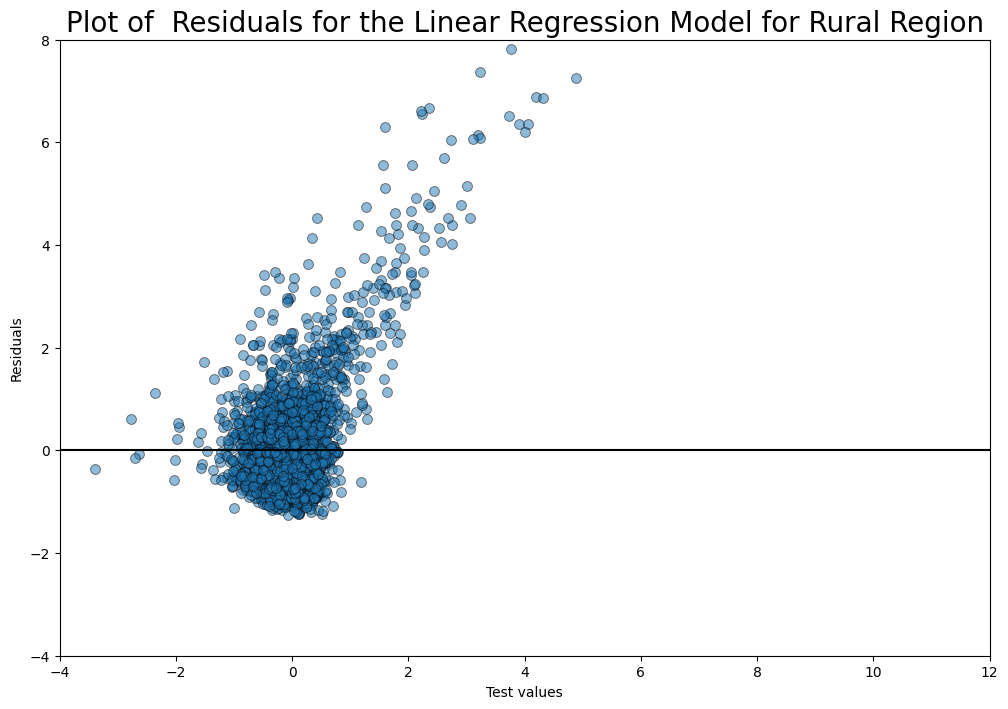

In [ ]:
residuals = y_test - ypred_test

plt.figure(figsize=(12,8))
plt.scatter(residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')

plt.ylim(-4,8)
plt.xlim(-4,12)
plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Linear Regression Model for Rural Region", size=20)
plt.show()

In [ ]:
x_poly_train = PolynomialFeatures(2).fit_transform(x_train)
x_poly_test = PolynomialFeatures(2).fit_transform(x_test)

# Fitting the data to a multiple polynomial regression model.

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly_train, y_train)

y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

# Calculating the test and train MSE for the fitted model.

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

# Also finding the R-squared value for test and train data.

r2score_train  = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1600
MSE for testing data 0.2103

R2 score for training data 0.8319
R2 score for testing data 0.8162


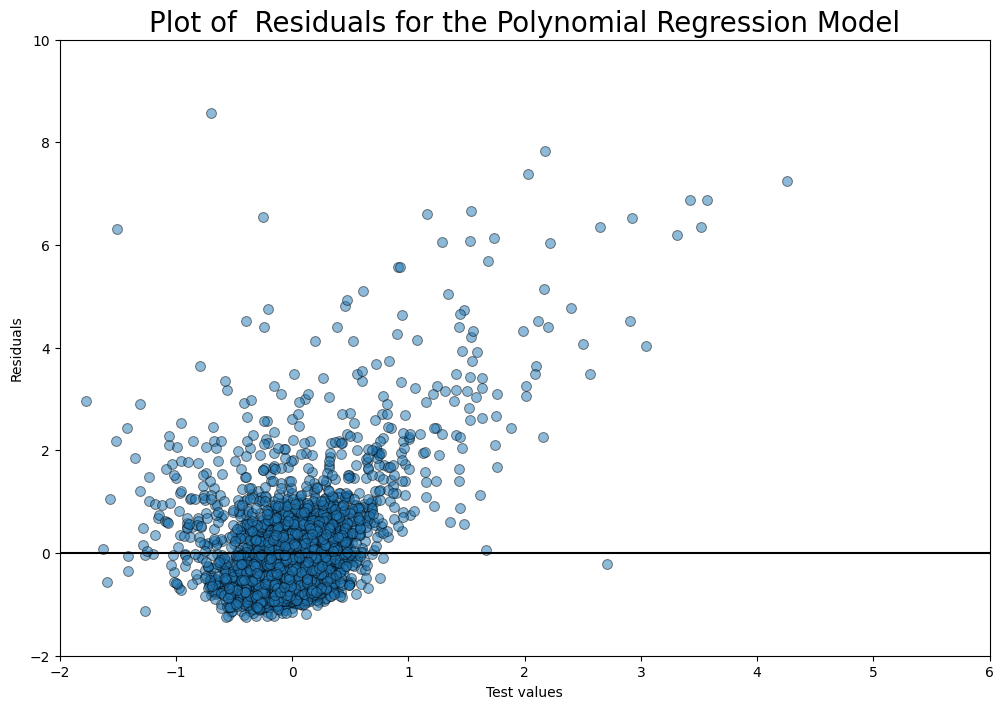

In [ ]:
Poly_residuals = y_test - y_pred_test

plt.figure(figsize=(12,8))
plt.scatter(Poly_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')
plt.ylim(-2, 10)
plt.xlim(-2, 6)

plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Polynomial Regression Model", size=20)
plt.show()

In [ ]:
X_urban = urban_std_df.drop(['price'], axis =1)
y_urban = urban_std_df['price']

print(X_urban.shape , y_urban.shape)

(15639, 18) (15639,)


In [ ]:
x_train, x_test , y_train , y_test  =  train_test_split(X_urban,y_urban, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Computing the train and test MSE values.

mse_train = mean_squared_error(y_train, ypred_train)
mse_test = mean_squared_error(y_test, ypred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}')

MSE for training data 0.2533
MSE for testing data 0.3206


In [ ]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, model.coef_[idcoff]))

The coefficient for bedrooms is -0.06572704702375229
The coefficient for bathrooms is 0.036384047821270527
The coefficient for sqft_living is 0.22313609761583383
The coefficient for sqft_lot is -0.008925477447142413
The coefficient for floors is -0.032380549530791294
The coefficient for sqft_above is 0.22359168152005424
The coefficient for sqft_basement is 0.06342476010772566
The coefficient for sqft_living15 is 0.0816990068394547
The coefficient for sqft_lot15 is -0.002780155055438441
The coefficient for Age_of_house is 0.14239709157267993
The coefficient for Population_density_per_sq_mile is 0.17985931971732044
The coefficient for Median_Household_Income is 0.20513127930771166
The coefficient for Land_Area_sq_mile is -0.0721727571120444
The coefficient for waterfront is 1.710319685447787
The coefficient for view is 0.10487287433903399
The coefficient for condition is 0.06843481480714735
The coefficient for grade is 0.22495308139350773
The coefficient for yr_renovated is 0.09348961179

In [ ]:
r2score_train  = r2_score(y_train, ypred_train)
r2score_test = r2_score(y_test, ypred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

R2 score for training data 0.7338
R2 score for testing data 0.7198


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.7167450322188851
0.6968324618518117


In [ ]:
for idcoff, columnname in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(columnname, lasso.coef_[idcoff]))

The coefficient for bedrooms is -0.04584684194881692
The coefficient for bathrooms is 0.012533526999261734
The coefficient for sqft_living is 0.36812917753847796
The coefficient for sqft_lot is 0.0
The coefficient for floors is -0.0
The coefficient for sqft_above is 0.0846621923641907
The coefficient for sqft_basement is 0.0
The coefficient for sqft_living15 is 0.07137432562170234
The coefficient for sqft_lot15 is 0.0
The coefficient for Age_of_house is 0.14718653680148966
The coefficient for Population_density_per_sq_mile is 0.1604110589464958
The coefficient for Median_Household_Income is 0.18938762642801626
The coefficient for Land_Area_sq_mile is -0.06103784455231572
The coefficient for waterfront is 0.22423302795832978
The coefficient for view is 0.16358732097412368
The coefficient for condition is 0.04462479427836005
The coefficient for grade is 0.22752832904603357
The coefficient for yr_renovated is 0.0


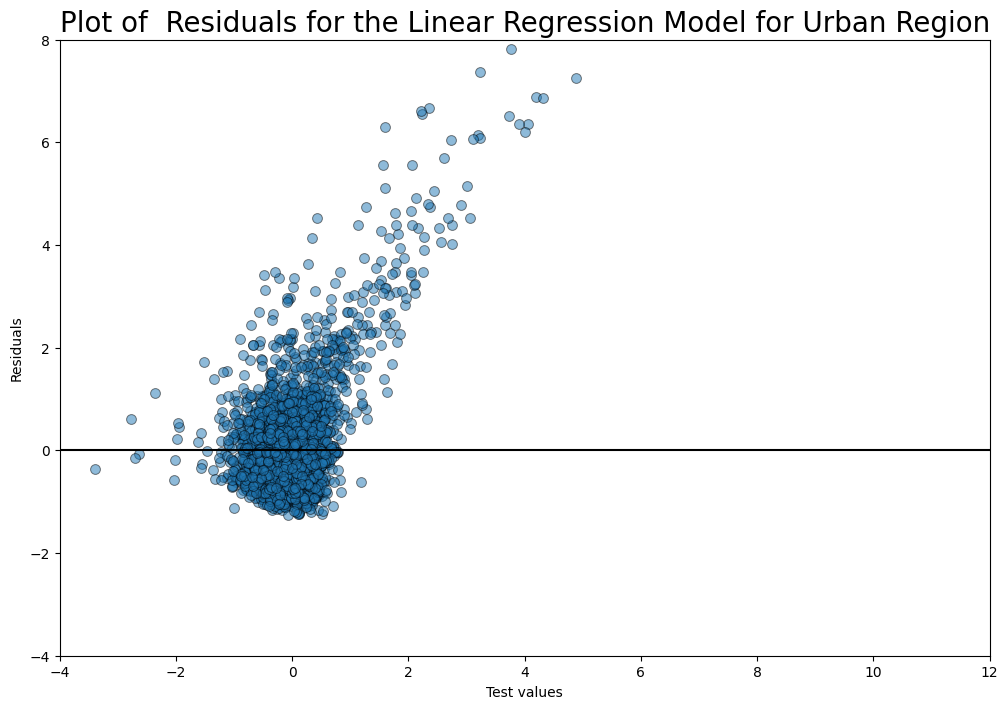

In [ ]:
residuals = y_test - ypred_test

plt.figure(figsize=(12,8))
plt.scatter(residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')

plt.ylim(-4,8)
plt.xlim(-4,12)
plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Linear Regression Model for Urban Region", size=20)
plt.show()

In [ ]:
x_poly_train = PolynomialFeatures(2).fit_transform(x_train)
x_poly_test = PolynomialFeatures(2).fit_transform(x_test)

# Fitting the data to a multiple polynomial regression model.

model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_poly_train, y_train)

y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

# Calculating the test and train MSE for the fitted model.

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE for training data {mse_train:.4f}')
print(f'MSE for testing data {mse_test:.4f}\n')

# Also finding the R-squared value for test and train data.

r2score_train  = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)

print(f'R2 score for training data {r2score_train:.4f}')
print(f'R2 score for testing data {r2score_test:.4f}')

MSE for training data 0.1600
MSE for testing data 0.2103

R2 score for training data 0.8319
R2 score for testing data 0.8162


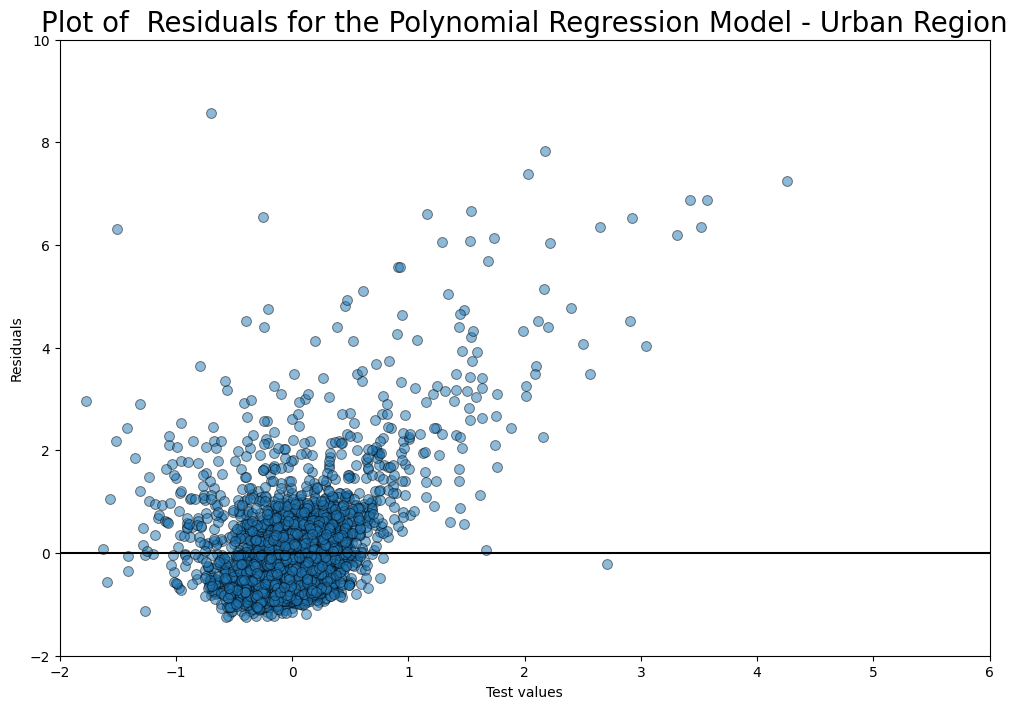

In [ ]:
Poly_residuals = y_test - y_pred_test

plt.figure(figsize=(12,8))
plt.scatter(Poly_residuals, y_test, alpha=0.5, ec='k', lw=0.7, s=50)
plt.axhline(y=0, color='k')
plt.ylim(-2, 10)
plt.xlim(-2, 6)

plt.ylabel("Residuals")
plt.xlabel("Test values")
plt.title("Plot of  Residuals for the Polynomial Regression Model - Urban Region", size=20)
plt.show()

In [ ]:

X_rural = rural_std_df.drop(['price'], axis =1)
y_rural = rural_std_df['price']

print(X_rural.shape , y_rural.shape)

(15639, 18) (15639,)


In [ ]:
x_train, x_test , y_train , y_test  =  train_test_split(X_rural,y_rural, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [ ]:
n_input = 18

#no. of nodes in hidden layer
n_hidden =  100

#no. of nodes in output layer
n_output = 1

In [ ]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9201 (35.94 KB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
147/147 [==============================] - 2s 4ms/step - loss: 0.3465 - val_loss: 0.3313
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2216 - val_loss: 0.2695
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1991 - val_loss: 0.2647
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1840 - val_loss: 0.2308
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1736 - val_loss: 0.2428
Epoch 6/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1629 - val_loss: 0.2052
Epoch 7/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1619 - val_loss: 0.2025
Epoch 8/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1503 - val_loss: 0.2180
Epoch 9/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.2240
Epoch 10/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1428 - val_lo

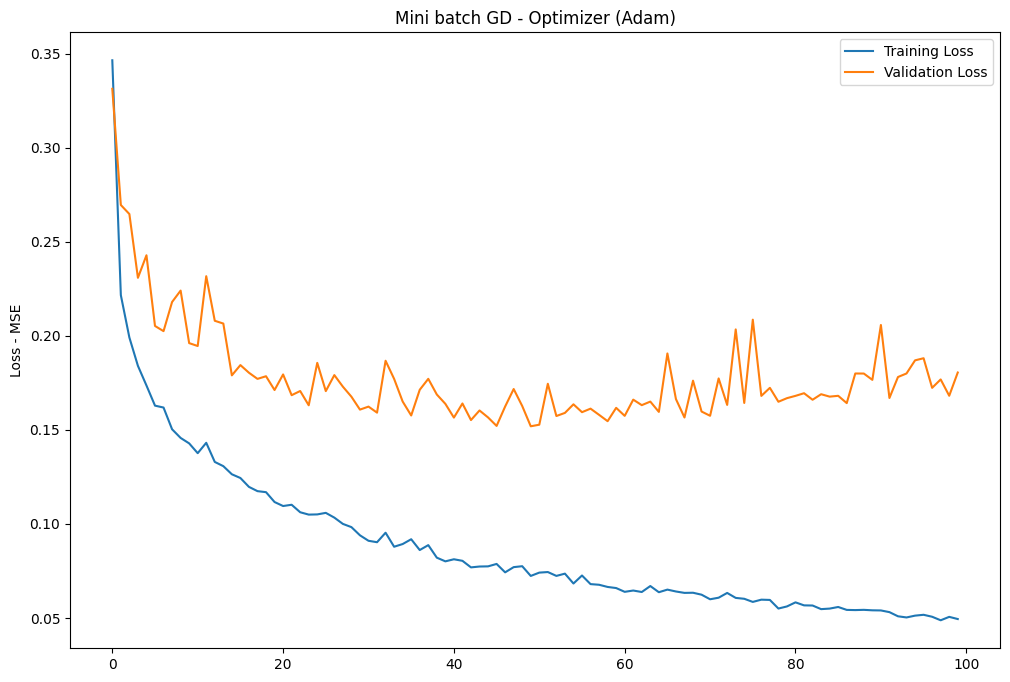

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [ ]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')

Training Loss is 0.0762
Testing Loss is 0.1681


In [ ]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

123/123 [==============================] - 0s 1ms/step
Training Accuracy is 0.9200
Testing Accuracy is 0.8531


In [ ]:
X_urban = urban_std_df.drop(['price'], axis =1)
y_urban = urban_std_df['price']

print(X_urban.shape , y_urban.shape)

(15639, 18) (15639,)


In [ ]:
x_train, x_test , y_train , y_test  =  train_test_split(X_urban,y_urban, train_size=0.75, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11729, 18) (3910, 18)
(11729,) (3910,)


In [ ]:
#no. of input nodes
n_input = 18

#no. of nodes in hidden layer
n_hidden =  100

#no. of nodes in output layer
n_output = 1

In [ ]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9201 (35.94 KB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 0.3441 - val_loss: 0.2880
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.2143 - val_loss: 0.2593
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1935 - val_loss: 0.2247
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1786 - val_loss: 0.2126
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1684 - val_loss: 0.2119
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1630 - val_loss: 0.2309
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1543 - val_loss: 0.1925
Epoch 8/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1538 - val_loss: 0.1946
Epoch 9/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1466 - val_loss: 0.2107
Epoch 10/100
147/147 [==============================] - 1s 4ms/step - loss: 0.1409 - val_lo

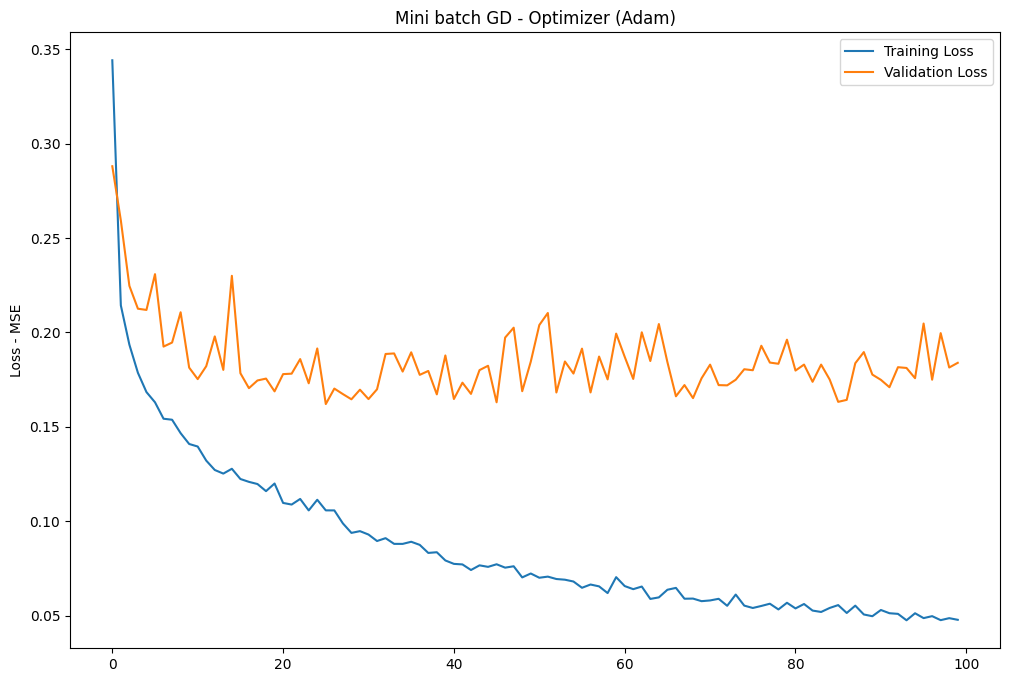

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [ ]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')

Training Loss is 0.0729
Testing Loss is 0.1595


In [ ]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

123/123 [==============================] - 0s 2ms/step
Training Accuracy is 0.9233
Testing Accuracy is 0.8606


In [ ]:
X_con = df_new.drop(['waterfront', 'view', 'condition', 'grade', 'yr_renovated'], axis =1)
X_cat  = df_new[['waterfront', 'view', 'condition', 'grade', 'yr_renovated']]

y = df_new[['price']]

In [ ]:
X_cat = X_cat.reset_index(drop = True)

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X_con)
y = scale.fit_transform(y)

In [ ]:
X = pd.DataFrame(X, columns = pd.DataFrame(X_con).columns)
y = pd.DataFrame(y, columns = ['price'])

df_both = pd.concat([X, X_cat], axis=1, join='inner')
display(df_both)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age_of_house,Population_density_per_sq_mile,Median_Household_Income,Land_Area_sq_mile,waterfront,view,condition,grade,yr_renovated
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.943355,-0.260715,0.533865,0.227111,-0.925297,-0.312377,0,0,3,7,0
1,-0.911594,-1.473959,-1.447464,-1.306483,-0.201040,-0.915427,-1.096995,-0.658681,-1.162213,-0.219329,0.874293,0.227111,-0.925297,-0.312377,0,0,4,6,0
2,-0.259012,-0.398737,0.175607,0.021886,-0.166732,-0.915427,-0.203353,0.425906,0.982596,-0.148569,0.125352,0.227111,-0.925297,-0.312377,0,2,3,8,0
3,-0.828310,-0.398737,-1.447464,-0.849176,-0.222334,-0.915427,-0.589793,-0.658681,-0.972536,-0.188600,0.329608,0.227111,-0.925297,-0.312377,0,0,3,7,0
4,-1.008088,-1.473959,-1.447464,-1.328260,-0.237616,-0.915427,-1.121148,-0.658681,-0.491048,-0.146261,1.384934,0.227111,-0.925297,-0.312377,0,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5.937894,0.676485,1.474063,2.079769,0.072623,0.936506,2.658718,-0.658681,2.135249,0.121543,-0.623589,-0.756473,4.243382,-0.375150,0,0,4,11,0
21609,3.840480,0.676485,1.798677,2.161431,0.087061,0.936506,2.749290,-0.658681,1.580809,0.217721,-0.555504,-0.756473,4.243382,-0.375150,0,0,4,10,0
21610,4.657654,1.751707,4.070975,1.448249,-0.168736,0.936506,1.958295,-0.658681,2.076887,0.127000,-1.168274,-0.756473,4.243382,-0.375150,0,0,3,11,0
21611,6.428198,1.751707,2.447905,3.386361,-0.012240,0.936506,4.107867,-0.658681,2.704281,0.237388,-1.440616,-0.756473,4.243382,-0.375150,0,1,3,11,0


In [ ]:
#no. of input nodes
n_input = 18

#no. of nodes in hidden layer
n_hidden =  100

#no. of nodes in output layer
n_output = 1

In [ ]:
model = keras.Sequential()

#hidden layer 1
model.add(layers.Dense(n_hidden, input_dim = n_input, activation = 'relu', name = 'hidden1'))


#hidden Layer 2
model.add(layers.Dense(60, activation = 'relu', name = 'hidden2'))

#hidden Layer 3
model.add(layers.Dense(20, activation = 'relu', name = 'hidden3'))


#hidden layer 4
# model.add(layers.Dense(5, activation = 'relu', name = 'hidden4'))
# model.add(Dropout(0.2))


#output layer
model.add(layers.Dense(n_output, activation = 'linear', name = 'output'))


model.compile(
    optimizer =  'adam',
    loss = 'mean_squared_error'
)


loss = tf.keras.losses.MeanSquaredError(reduction = 'sum_over_batch_size')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               1900      
                                                                 
 hidden2 (Dense)             (None, 60)                6060      
                                                                 
 hidden3 (Dense)             (None, 20)                1220      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 9201 (35.94 KB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history  =  model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_split = 0.2)

Epoch 1/100
147/147 [==============================] - 2s 5ms/step - loss: 0.3340 - val_loss: 0.3558
Epoch 2/100
147/147 [==============================] - 1s 4ms/step - loss: 0.2220 - val_loss: 0.2869
Epoch 3/100
147/147 [==============================] - 1s 4ms/step - loss: 0.2003 - val_loss: 0.2499
Epoch 4/100
147/147 [==============================] - 1s 4ms/step - loss: 0.1850 - val_loss: 0.2509
Epoch 5/100
147/147 [==============================] - 1s 4ms/step - loss: 0.1689 - val_loss: 0.2322
Epoch 6/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1586 - val_loss: 0.2079
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1529 - val_loss: 0.2155
Epoch 8/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1518 - val_loss: 0.2222
Epoch 9/100
147/147 [==============================] - 0s 2ms/step - loss: 0.1448 - val_loss: 0.2029
Epoch 10/100
147/147 [==============================] - 0s 3ms/step - loss: 0.1435 - val_lo

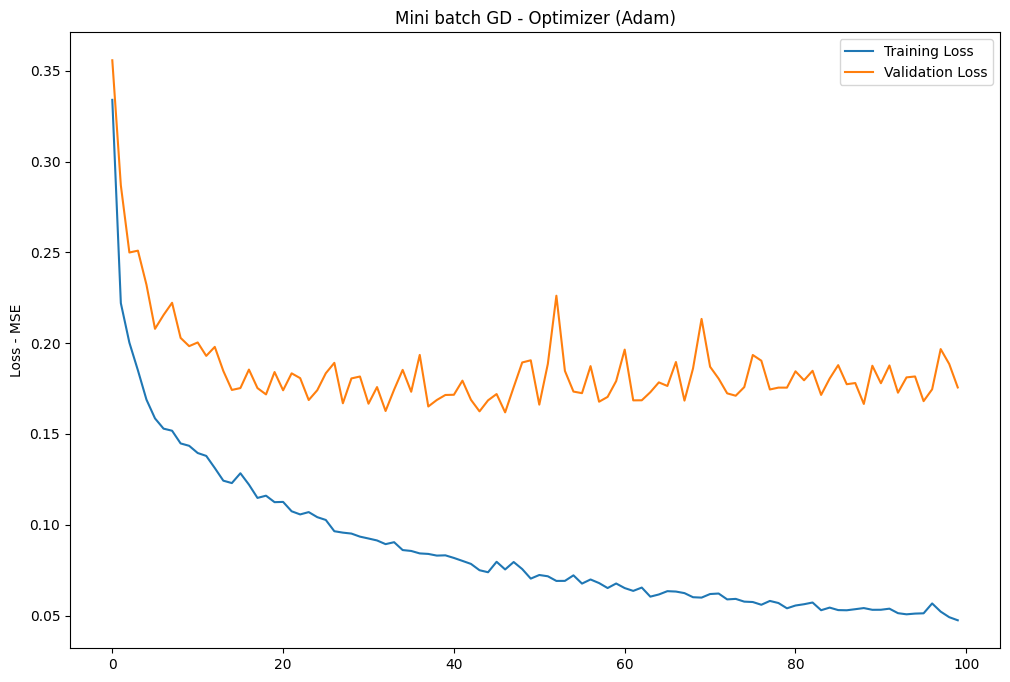

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.ylabel('Loss - MSE')
plt.title('Mini batch GD - Optimizer (Adam)')
plt.show()

In [ ]:
train_loss =  model.evaluate(x_train,y_train, verbose = 0)
test_loss = model.evaluate(x_test, y_test, verbose = 0)

print(f'Training Loss is {train_loss:.4f}')
print(f'Testing Loss is {test_loss:.4f}')


Training Loss is 0.0700
Testing Loss is 0.1639


In [ ]:
train_accuracy = r2_score(y_train, model.predict(x_train))
test_accuracy =  r2_score(y_test, model.predict(x_test))

print(f'Training Accuracy is {train_accuracy:.4f}')
print(f'Testing Accuracy is {test_accuracy:.4f}')

123/123 [==============================] - 0s 2ms/step
Training Accuracy is 0.9265
Testing Accuracy is 0.8568


In [ ]:
results_rural  =  pd.DataFrame({'Linear_Regression': [0.2489,0.2858,0.7486,0.7225],
                         'Polynomial_Regression': [0.1099,0.1808,0.889,0.8244],
                          'Neural_Network': [0.0668,0.1235,0.9326,0.8801]
                        }, index= ['Training_mse', 'Testing_mse', 'Training_Score', 'Testing_Score'])

results_urban =  pd.DataFrame({'Linear Regression': [0.2533,0.3206,0.7338,0.7198],
                         'Polynomial Regression': [0.16,0.21,0.8319,0.8162],
                          'Neural Network': [0.0764,0.1768,0.9197,0.8455]
                        }, index= ['Training mse', 'Testing mse', 'Training_Score', 'Testing_Score'])

display(results_rural)

,Linear_Regression,Polynomial_Regression,Neural_Network
Training_mse,0.2489,0.1099,0.0668
Testing_mse,0.2858,0.1808,0.1235
Training_Score,0.7486,0.8890,0.9326
Testing_Score,0.7225,0.8244,0.8801


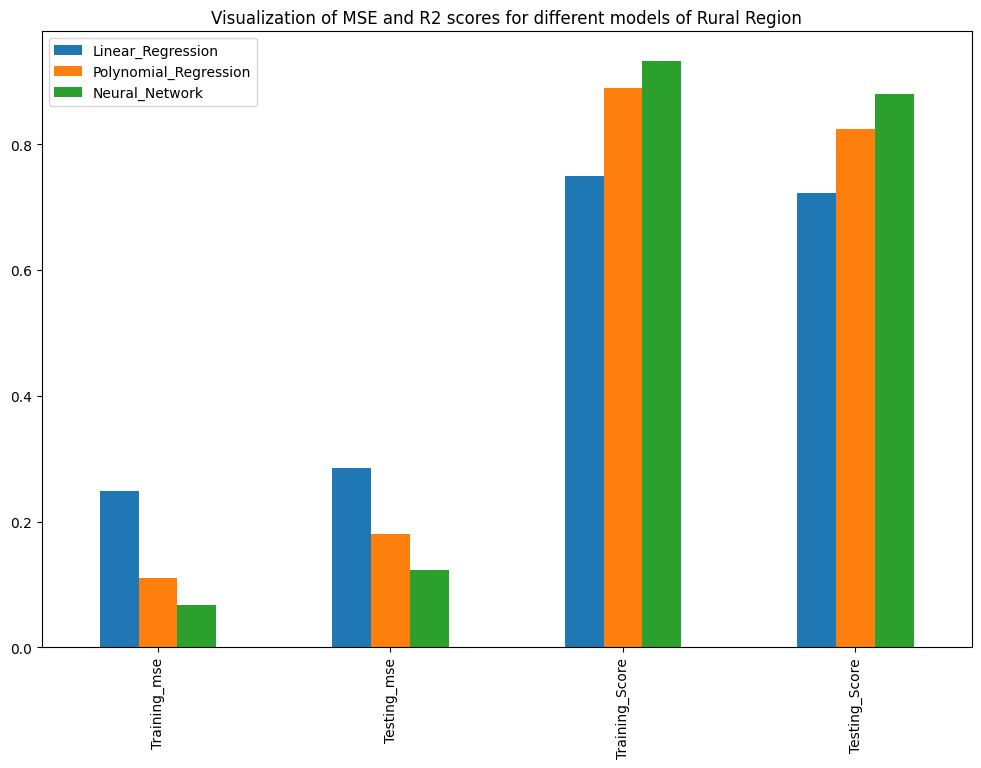

In [ ]:
results_rural.plot(kind= 'bar', figsize=(12,8))
plt.title('Visualization of MSE and R2 scores for different models of Rural Region')
plt.show()

In [ ]:
results_urban =  pd.DataFrame({'Linear Regression': [0.2533,0.3206,0.7338,0.7198],
                         'Polynomial Regression': [0.16,0.21,0.8319,0.8162],
                          'Neural Network': [0.0764,0.1768,0.9197,0.8455]
                        }, index= ['Training mse', 'Testing mse', 'Training_Score', 'Testing_Score'])

display(results_urban)

,Linear Regression,Polynomial Regression,Neural Network
Training mse,0.2533,0.1600,0.0764
Testing mse,0.3206,0.2100,0.1768
Training_Score,0.7338,0.8319,0.9197
Testing_Score,0.7198,0.8162,0.8455


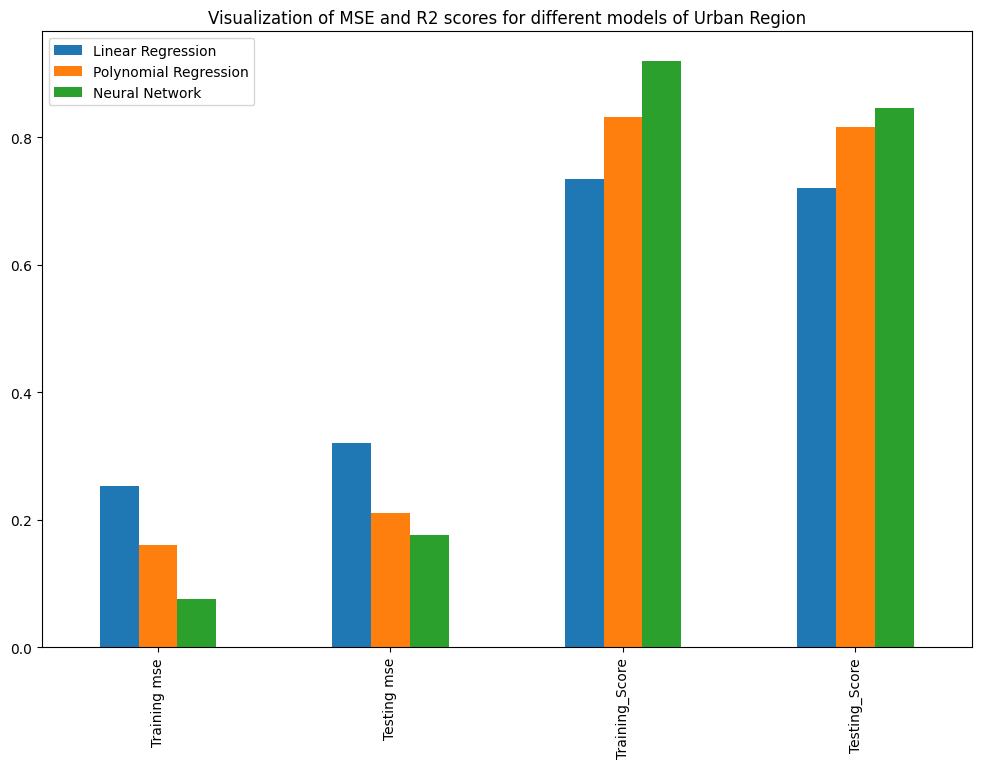

In [ ]:
results_urban.plot(kind= 'bar', figsize=(12,8))
plt.legend(loc = 'upper left')
plt.title('Visualization of MSE and R2 scores for different models of Urban Region')
plt.show()

In [ ]:
!pip install flask-ngrok

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import pickle

In [ ]:
import os
import pickle

# Ensure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Specify the file path where you want to save the pickle file in your Google Drive
file_path = '/content/drive/My Drive/Regression_model.pkl'

# Create directories if they don't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {file_path}')


Mounted at /content/drive
Model saved to /content/drive/My Drive/Regression_model.pkl


In [ ]:
cd /content/drive/MyDrive/Regression_model.pkl

[Errno 20] Not a directory: '/content/drive/MyDrive/Regression_model.pkl'
/content


In [ ]:
!pip install flask


In [ ]:
# Import necessary libraries
import os
import pickle
from flask import Flask, request, jsonify

# Ensure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Initialize Flask application
app = Flask(__name__)

# Load the model
file_path = '/content/drive/My Drive/Regression_model.pkl'
with open(file_path, 'rb') as file:
    model = pickle.load(file)

# Define a route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)

    # Perform prediction using the loaded model
    prediction = model.predict([data['input']])

    # Prepare response in JSON format
    response = {'prediction': prediction[0]}
    return jsonify(response)

# Run the application
if __name__ == '__main__':
    app.run(port=8888)  # Adjust the port number as needed


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8888
INFO:werkzeug:Press CTRL+C to quit
